# Project-538- Forecast Gold Prices

# 1. Data Preprocessing and EDA:
## 1.1. Data Exploration Technique
## 1.2. Project - Gold Price Prediction
## 1.3. Exploratory Data Analysis (EDA)
## 1.4. Data Visualization
## 1.5. Feature Engineering (Time-Based features and One-Hot Encoding)
## 1.6. Correlation Matrix & Heatmap
## 1.7. Stationarity Check (ADF Test)
## 1.8. Time Series Decomposition (Seasonal Decomposition)
## 1.9. Statistical Analysis
## 1.10. Resampling

# 2. Model Building:
## 2. 1. Simple Linear Regression
## 2. 2. ARIMA
## 2. 3. SARIMA
## 2. 4. Prophet
## 2. 5. Hyperparameter tuning
## 2. 6. Evaluation.

# 3. Model Deployment using TIME SERIES:
## 3.1: Data Preparation and Exploration
### 3.1.a. Data Loading
### 3.1.b. Initial Exploration (Plotting Time Series)
### 3.1.c. Data Preprocessing

## 3.2: ARIMA Model Building
### 3.2.a. Parameter Selection for ARIMA
### 3.2.b. Model Fitting
### 3.2.c. Diagnostics
### 3.2.d. Forecasting

## 3.3: Exponential Smoothing
### 3.3.a. Model Selection
### 3.3.b. Parameter Optimization
### 3.3.c. Model Fitting and Forecasting

## 3.4: Evaluation Metrics & Comparison
### 3.4.a. Compute Error Metrics
### 3.4.b. Model Comparison
### 3.4.c. Conclusion

## 3.5. Visualization: Forecasts vs Actuals

# 4: Streamlit deployment

# 5: Conclusion


### 1. Data Exploration Technique
### 1.1. Profile Report with pandas-profiling (Ydata-profiling)

In [ ]:
#Profile Report (with Ydata-profiling)

# Import libraries
!pip install pandas_profiling==3.1.0
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fdbf036ebe789e59f107d75353f117fa5b37af64f997dce7ab1b1da6c907cf9b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
  Created wheel for markupsafe: filename=MarkupSafe-2.0.1-cp311-cp311-linux_x86_64.whl size=27995 sha256=01359fa5c0b1eb322737790b6212e037e1977719aba2a05a64dba448b8b3c424
  Stored

In [ ]:
import pandas as pd
data=pd.read_csv("Gold_data.csv")

In [ ]:
from pandas_profiling import ProfileReport
import ydata_profiling as pp

<ipython-input-3-fba75567b8ac>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
profile=ProfileReport(data, title="Exploratory Data Analysis")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00, 21.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.2. Project - Gold Price Prediction

### 1.2.a. Loading Libraries
#### Reasons:
#### pandas: for data loading and manipulation.
#### numpy: for Mathematical functions (like mean, standard deviation, dot product)
#### matplotlib.pyplot & seaborn: for visualization.
#### statsmodels.tsa.seasonal: for time series decomposition.
#### statsmodels.tsa.stattools.adfuller: for stationarity check (ADF test).
#### scipy.stats: for normality tests and statistical computations.

In [ ]:
# Import Neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats

### 1.2.b. Data Loading
#### Reason:
#### Reads the CSV file into a DataFrame.

In [ ]:
# Load the dataset
df = pd.read_csv('Gold_data.csv')

### 1.3. Exploratory Data Analysis (EDA)
### 1.3.a. Data Cleaning and Conversion (Date parsing, missing & duplicate checks)
#### Reason:
#### Converts date column to datetime.
#### Drops rows where date conversion failed (Drop any rows with invalid dates).
#### Sets date as the DataFrame index and sorts it chronologically — crucial for time series.


In [ ]:
# Data Cleaning & Conversion
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

In [ ]:
# Set date as index
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

### 1.3.b. Memory Optimization
#### Reason:
#### Reduces memory usage by converting prices to a more efficient float type.

In [ ]:
# Memory Optimization
df['price'] = pd.to_numeric(df['price'], downcast='float')

### 1.3.c. Data Quality Checks (Basic Overview and Cleaning)
#### Reason:
#### Checks for missing values in each column.
#### Identifies duplicate records to ensure data integrity.

In [ ]:
# Data Quality Checks
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float32
dtypes: float32(1)
memory usage: 25.6 KB
None

First few rows:
                  price
date                   
2016-01-01  2252.600098
2016-01-02  2454.500000
2016-01-03  2708.100098
2016-01-04  2577.800049
2016-01-05  2597.750000


In [ ]:
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Records:", df.duplicated().sum())

Missing Values:
 price    0
dtype: int64

Duplicate Records: 306


### 1.3.d. Summary Statistics
#### Reason:
#### Provides basic statistics (mean, std, min, max, etc.) for the price column.

In [ ]:
# Summary Stats
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
              price
count  2182.000000
mean   3284.449951
std     719.564331
min    2252.600098
25%    2697.019958
50%    2879.800049
75%    4147.325073
max    4966.299805


### 1.4. Data Visualization (Line, histogram, boxplot)
### 1.4.a. Time Series Line Plot
#### Reason:
#### Shows how gold prices change over time. Helps identify trends and irregular patterns.

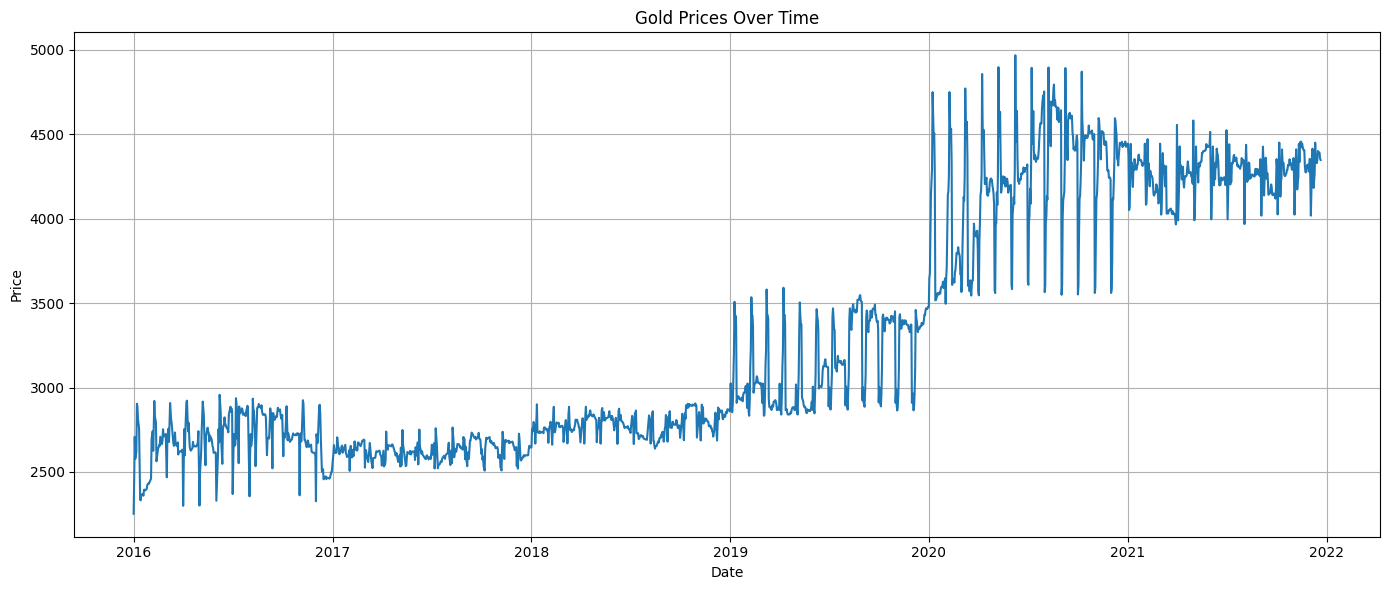

In [ ]:
# Visualization - Line Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x=df.index, y='price')
plt.title("Gold Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

### 1.4.b. Histogram for distribution
#### Reason:
#### Histogram: Displays price distribution and frequency.
#### KDE: Smooth curve showing probability density.

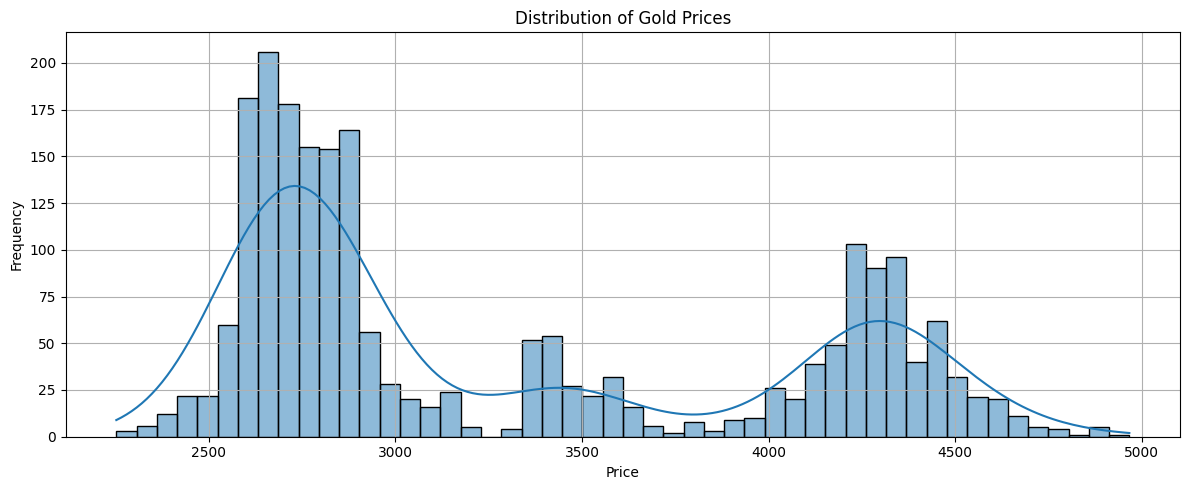

In [ ]:
# Histogram
plt.figure(figsize=(12, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Gold Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

### 1.4.c. Boxplot to detect outliers
#### Boxplot: Visualizes outliers, median, and quartiles.

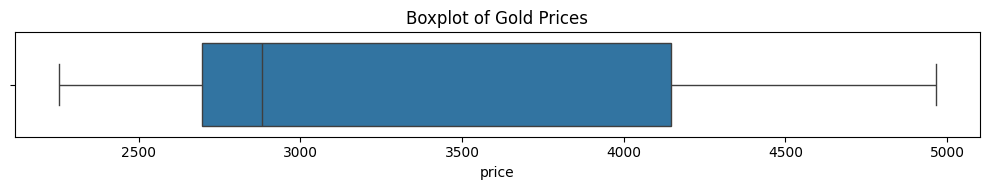

In [ ]:
# Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Gold Prices")
plt.tight_layout()
plt.show()

### 1.5. Feature Engineering (Time-based features and one-hot encoding)
### 1.5.a. Extract time-based features
#### Reason:
#### Extracts useful date parts to help identify seasonal patterns and trends

In [ ]:
# Extract time-based features for encoding
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.weekday

In [ ]:
# Daily price change (This was moved here)
df['price_change'] = df['price'].diff()

In [ ]:
# Daily return (percentage change) (This was moved here)
df['price_return'] = df['price'].pct_change() * 100

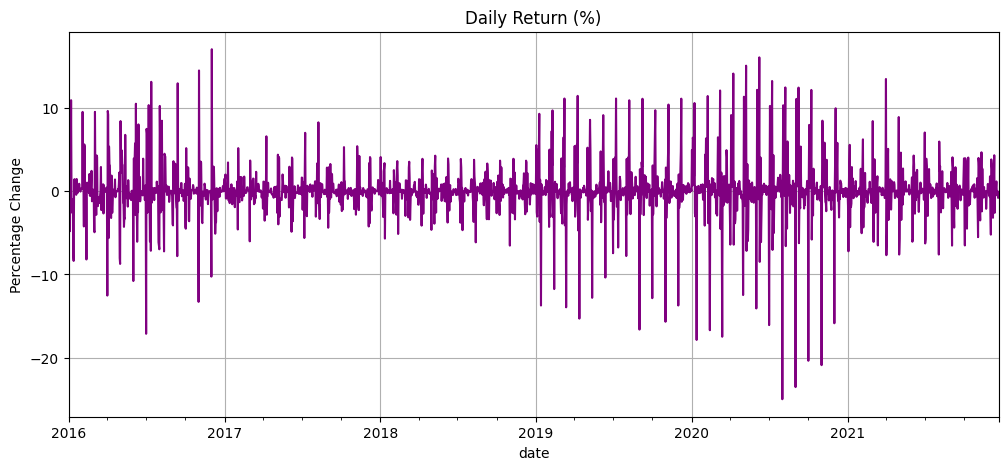

In [ ]:
plt.figure(figsize=(12,5))
df['price_return'].plot(color='purple')
plt.title('Daily Return (%)')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()

### 1.5.b. One-Hot Encoding
#### Reason: Converts categorical month and weekday into binary variables (one-hot).
#### Drops the first category to avoid multicollinearity.

In [ ]:
# One-Hot Encoding for categorical time features
df_encoded = pd.get_dummies(df, columns=['month', 'weekday'], drop_first=True)

In [ ]:
# Display first few rows of encoded data
print(df_encoded.head())

                  price  year  day  price_change  price_return  month_2  \
date                                                                      
2016-01-01  2252.600098  2016    1           NaN           NaN    False   
2016-01-02  2454.500000  2016    2    201.899902      8.962976    False   
2016-01-03  2708.100098  2016    3    253.600098     10.332048    False   
2016-01-04  2577.800049  2016    4   -130.300049     -4.811496    False   
2016-01-05  2597.750000  2016    5     19.949951      0.773919    False   

            month_3  month_4  month_5  month_6  ...  month_9  month_10  \
date                                            ...                      
2016-01-01    False    False    False    False  ...    False     False   
2016-01-02    False    False    False    False  ...    False     False   
2016-01-03    False    False    False    False  ...    False     False   
2016-01-04    False    False    False    False  ...    False     False   
2016-01-05    False    False  

### 1.6. Correlation Matrix & Heatmap (Understand relationships)
#### Reason:
#### Computes pairwise correlation.
#### Visualizes correlations to find relationships between features (e.g., month, weekday, price).

In [ ]:
# Correlation Matrix
corr_matrix = df_encoded.corr()

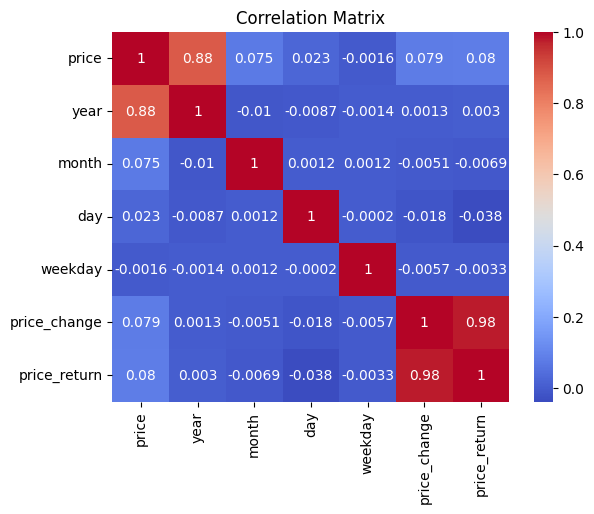

In [ ]:
# For now it's only 'price', 'price_change', 'price_return'
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### 1.7. Stationarity Check - ADF Test(Augmented Dickey-Fuller)
#### Reason:
#### ADF Test checks if the series is stationary (constant mean/variance over time).
#### If p-value < 0.05, the series is considered stationary.

In [ ]:
# Stationarity Test - ADF (ADF test for ARIMA suitability)
result = adfuller(df['price'])
print('\nADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')


ADF Statistic: -0.3099035718927911
p-value: 0.9240899311714237
Critical Value (1%): -3.4333881004322455
Critical Value (5%): -2.8628821222065013
Critical Value (10%): -2.5674844795732152


### Interpretation:
#### If p-value < 0.05 → Series is stationary → Good for ARIMA
#### Else → Needs differencing

### 1.8. Seasonal Decomposition (Time Series Decomposition)
#### Decomposes the time series into Trend, Seasonal, and Residual components.
#### Period set to 365 for yearly seasonality.

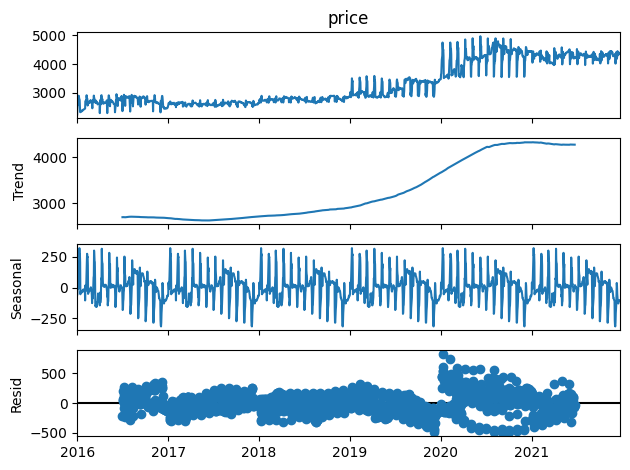

In [ ]:
# Decompose Time Series
decomposition = seasonal_decompose(df['price'], model='additive', period=365)
decomposition.plot()
plt.tight_layout()
plt.show()

### 1.9. Statistical Analysis (Normality Check)
#### Reason:
#### Skewness: Measures symmetry (right/left-skewed).
#### Kurtosis: Measures tail heaviness (peakedness).

In [ ]:
# Statistical Analysis
print("\nSkewness:", df['price'].skew())
print("Kurtosis:", df['price'].kurt())


Skewness: 0.6373118
Kurtosis: -1.2431586


In [ ]:
# Shapiro test (on sample for speed)
sample = df['price'].sample(n=500, random_state=42)
stat, p = stats.shapiro(sample)
print("Shapiro-Wilk Test:")
print("Test Statistic =", stat)
print("p-value =", p)

Shapiro-Wilk Test:
Test Statistic = 0.8333381162558261
p-value = 1.8507857169445594e-22


### Interpretation:
#### If p-value < 0.05, data is not normally distributed

### 1.10. Resampling
#### Reason:
#### Aggregates data by month to smooth short-term fluctuations.
#### Highlights long-term trends in gold prices.

<ipython-input-28-dbef08070d09>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['price'].resample('M').mean()


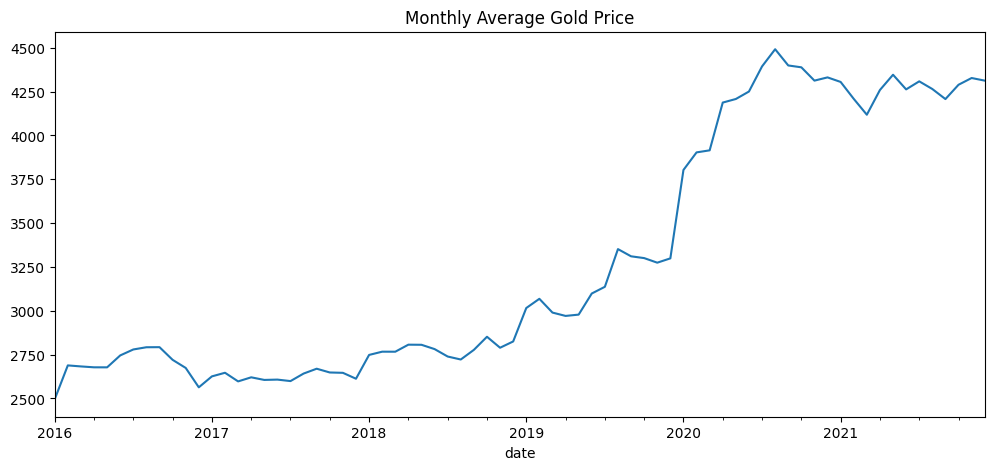

In [ ]:
# Resampling
monthly_avg = df['price'].resample('M').mean()
monthly_avg.plot(figsize=(12, 5), title='Monthly Average Gold Price')
plt.show()

## 2. Model Building:


## 2. Data Preprocessing and EDA:
### 2.a. Loading the dataset
### 2.b. Converting dates and set the index
### 2.c. Visualizing the data

In [ ]:
## Import necessary libraries

# For Preprocessing and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# For ARIMA and SARIMA
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import itertools

# For Prophet
from prophet import Prophet

In [ ]:
# a. Load the dataset
gold_df = pd.read_csv('Gold_data.csv')

In [ ]:
# b. Convert 'date' column to datetime and set it as index
gold_df['date'] = pd.to_datetime(gold_df['date'])
gold_df.set_index('date', inplace=True)
gold_df.sort_index(inplace=True)

In [ ]:
# Quick summary and check missing values
print("Missing values per column:\n", gold_df.isnull().sum())
print("Data summary:\n", gold_df.describe())

Missing values per column:
 price    0
dtype: int64
Data summary:
              price
count  2182.000000
mean   3284.450046
std     719.564434
min    2252.600000
25%    2697.020000
50%    2879.800000
75%    4147.325000
max    4966.300000


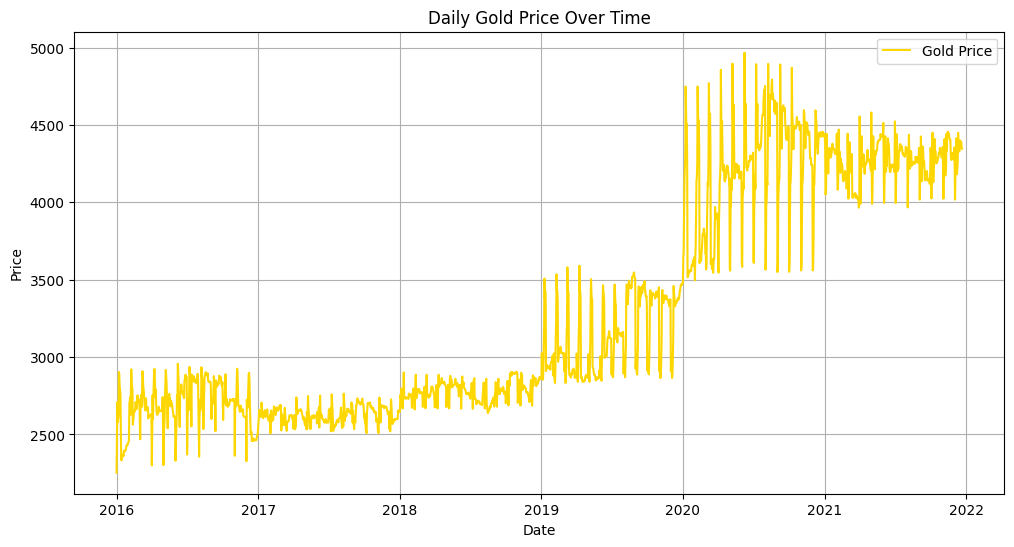

In [ ]:
# Visualizing the data
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(gold_df.index, gold_df['price'], color='gold', label='Gold Price')
plt.title('Daily Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## 2. 1. Simple Linear Regression
### a. Convert dates into a numeric feature
### b. Train/test split, training the linear regression model
### c. Evaluate with RMSE and MAE

In [ ]:
# 2. Model 1: Simple Linear Regression

# Convert date index to a numerical variable (ordinal)
gold_df['time_ordinal'] = gold_df.index.map(pd.Timestamp.toordinal)

In [ ]:
# Define feature and target variables
X = gold_df[['time_ordinal']]
y = gold_df['price']

In [ ]:
# Train-test split (Split into training and testing sets - 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [ ]:
# Model training (Instantiate and fit the linear regression model)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediction
y_pred_lr = lr_model.predict(X_test)

# Evaluate on test set
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression MAE:", mae_lr)

Linear Regression RMSE: 336.1625131235629
Linear Regression MAE: 284.22227432470834


## 2. 2. ARIMA Model:
### a. Grid search over a set of (p, d, q) parameters using the training set
### b. Fit the selected ARIMA model and forecast
### c. Evaluate predictions

In [ ]:
# Model 2.2: ARIMA

# Defining the range for hyperparameters p, d, q. In production, expand grid search as needed.
import itertools

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

In [ ]:
# Using a simple grid search to select the best ARIMA parameters based on AIC
best_aic = np.inf
best_order = None
best_mdl = None

In [ ]:
# We use a subset of the data for model selection (train split)
train_arima = gold_df['price'][:int(len(gold_df)*0.8)]

for order in pdq:
    try:
        mdl = sm.tsa.ARIMA(train_arima, order=order).fit()
        if mdl.aic < best_aic:
            best_aic = mdl.aic
            best_order = order
            best_mdl = mdl
    except Exception as e:
        continue

print("Best ARIMA order:", best_order, "with AIC:", best_aic)

Best ARIMA order: (2, 1, 2) with AIC: 21313.55797941653


In [ ]:
# Fitting ARIMA with best parameters on entire training data and forecast for test period length
arima_model = sm.tsa.ARIMA(train_arima, order=best_order).fit()
n_test = len(gold_df) - len(train_arima)
arima_forecast = arima_model.forecast(steps=n_test)

In [ ]:
# Evaluate ARIMA
actual = gold_df['price'][len(train_arima):]
rmse_arima = np.sqrt(mean_squared_error(actual, arima_forecast))
mae_arima = mean_absolute_error(actual, arima_forecast)
print("ARIMA RMSE:", rmse_arima)
print("ARIMA MAE:", mae_arima)

ARIMA RMSE: 189.95470949063267
ARIMA MAE: 144.95111053544798


## 2. 3: SARIMA Model
### a. Grid search over seasonal parameters (P, D, Q, s)
### b. Fit a SARIMA model on the data
### c. Forecast and evaluate

In [ ]:
# Model 2. 3: SARIMA

# Defining seasonal parameters. Assuming seasonality of 7 days if weekly periodicity, or adjust as needed.
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(range(0, 2), range(0, 2), range(0, 2)))]
best_aic_sarima = np.inf
best_order_sarima = None
best_seasonal_order = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_arima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_aic_sarima:
                best_aic_sarima = results.aic
                best_order_sarima = param
                best_seasonal_order = param_seasonal
        except Exception as e:
            continue

print("Best SARIMA order:", best_order_sarima, "Seasonal order:", best_seasonal_order, "with AIC:", best_aic_sarima)

Best SARIMA order: (1, 1, 2) Seasonal order: (1, 1, 1, 7) with AIC: 21086.14458560708


In [ ]:
# Fitting the best SARIMA model on training data
sarima_model = sm.tsa.statespace.SARIMAX(train_arima,
                                         order=best_order_sarima,
                                         seasonal_order=best_seasonal_order,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False).fit(disp=False)
sarima_forecast = sarima_model.forecast(steps=n_test)

In [ ]:
# Evaluate SARIMA
rmse_sarima = np.sqrt(mean_squared_error(actual, sarima_forecast))
mae_sarima = mean_absolute_error(actual, sarima_forecast)
print("SARIMA RMSE:", rmse_sarima)
print("SARIMA MAE:", mae_sarima)

SARIMA RMSE: 451.3292180207391
SARIMA MAE: 403.68725560697027


## 2. 4: Prophet Model
### Prepare the data format required by Prophet
###  Tune key hyperparameters (like changepoint_prior_scale, seasonality_mode)
### Forecast future values and compute evaluation metrics

In [ ]:
# Model 4: Prophet

# Prophet requires data to be in a specific format with columns 'ds' and 'y'
prophet_df = gold_df[['price']].reset_index().rename(columns={'date': 'ds', 'price': 'y'})

In [ ]:
prophet_model = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=True,
    weekly_seasonality=True
)

In [ ]:
# Split the data into training and testing set
train_size = int(0.8 * len(prophet_df))
train_prophet = prophet_df[:train_size]
test_prophet = prophet_df[train_size:]

In [ ]:
# Define and fit the Prophet model
# Here we tune 'changepoint_prior_scale' and use additive seasonality by default.
prophet_model = Prophet(changepoint_prior_scale=0.05, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.fit(train_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg9rqj396/v4bfp3wh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg9rqj396/87dyctos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86346', 'data', 'file=/tmp/tmpg9rqj396/v4bfp3wh.json', 'init=/tmp/tmpg9rqj396/87dyctos.json', 'output', 'file=/tmp/tmpg9rqj396/prophet_model_affeos3/prophet_model-20250531085404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:54:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:54:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Forecast using Prophet for the length of the test set
future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='D')
forecast = prophet_model.predict(future)

In [ ]:
# Extract predicted values for the test period
forecast_test = forecast[['ds', 'yhat']].set_index('ds').loc[test_prophet['ds']]
rmse_prophet = np.sqrt(mean_squared_error(test_prophet['y'], forecast_test['yhat']))
mae_prophet = mean_absolute_error(test_prophet['y'], forecast_test['yhat'])
print("Prophet RMSE:", rmse_prophet)
print("Prophet MAE:", mae_prophet)

Prophet RMSE: 1156.8878287059583
Prophet MAE: 1058.4249548594107


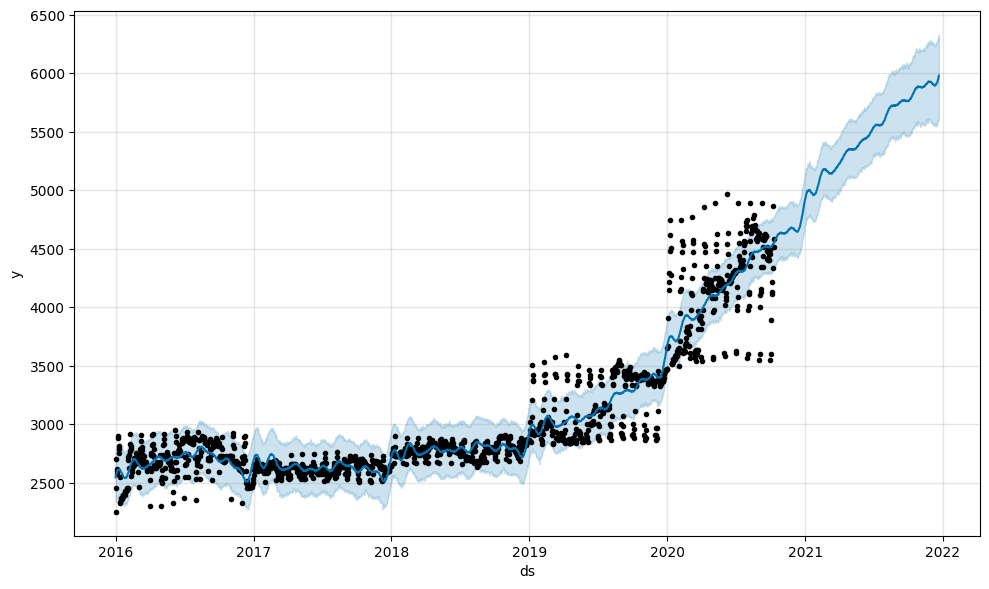

In [ ]:
# Plot Prophet forecast (optional)
fig = prophet_model.plot(forecast)
plt.show()

## 2.5: Model Selection Summary

In [ ]:
# 2.5: Model Selection Summary
print("Model Evaluation Metrics:")
print(f"Linear Regression - RMSE: {rmse_lr:.2f}, MAE: {mae_lr:.2f}")
print(f"ARIMA           - RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}")
print(f"SARIMA          - RMSE: {rmse_sarima:.2f}, MAE: {mae_sarima:.2f}")
print(f"Prophet         - RMSE: {rmse_prophet:.2f}, MAE: {mae_prophet:.2f}")

Model Evaluation Metrics:
Linear Regression - RMSE: 336.16, MAE: 284.22
ARIMA           - RMSE: 189.95, MAE: 144.95
SARIMA          - RMSE: 451.33, MAE: 403.69
Prophet         - RMSE: 1156.89, MAE: 1058.42


## 3. Model Deployment using TIME SERIES:

## 3.1: Data Preparation and Exploration
### 3.1.a. Data Loading
### 3.1.b. Initial Exploration (Plotting Time Series)
### 3.1.c. Data Preprocessing

In [ ]:
# 1. Data Loading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('Gold_data.csv')

In [ ]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB
None
         date    price
0  2016-01-01  2252.60
1  2016-01-02  2454.50
2  2016-01-03  2708.10
3  2016-01-04  2577.80
4  2016-01-05  2597.75


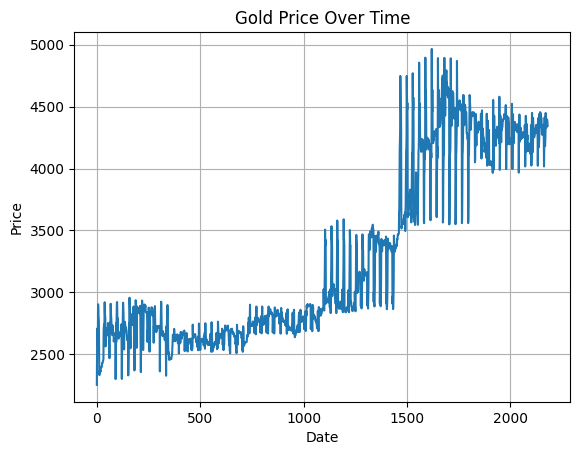

In [ ]:
# 2. Initial Exploration (Plotting Time Series)
# Plotting the time series
plt.plot(df['price']) # Changed 'Price' to 'price'
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
# 3. Data Preprocessing
# Check for missing values
print(df.isnull().sum())

date     0
price    0
dtype: int64


In [ ]:
# Fill or drop missing values
df = df.fillna(method='ffill')

In [ ]:
# Ensure the index is in datetime format
df.index = pd.to_datetime(df.index)


## 3.2: ARIMA Model Building
### 3.2.a. Parameter Selection for ARIMA
### 3.2.b. Model Fitting
### 3.2.c. Diagnostics
### 3.2.d. Forecasting

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

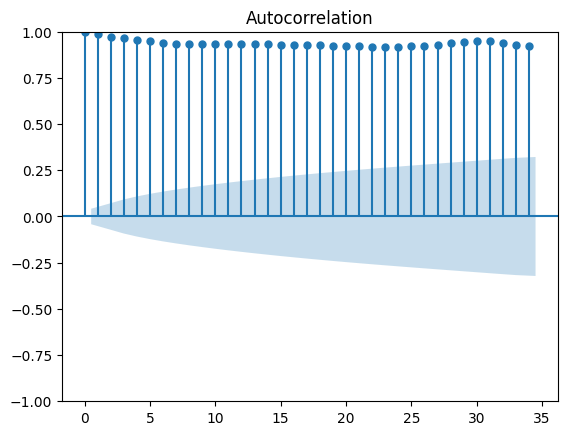

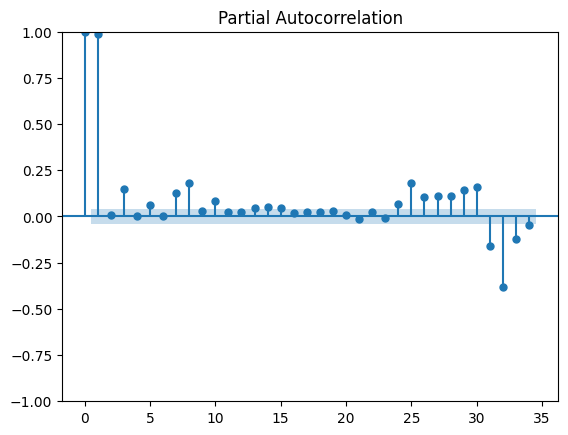

In [ ]:
# 1. Parameter Selection for ARIMA
# Plot ACF and PACF
plot_acf(df['price'])
plot_pacf(df['price'])
plt.show()

In [ ]:
# 2. Model Fitting
# Based on plots, choose p=5, d=1, q=0 as starting point (can adjust after testing)
# Fit ARIMA model (you can change p,d,q based on ACF/PACF)
model_arima = ARIMA(df['price'], order=(5,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -13390.066
Date:                Sat, 31 May 2025   AIC                          26792.131
Time:                        08:59:34   BIC                          26826.257
Sample:                    01-01-1970   HQIC                         26804.607
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0122      0.016     -0.785      0.432      -0.043       0.018
ar.L2         -0.1688      0.018     -9.575      0.000      -0.203      -0.134
ar.L3         -0.0131      0.019     -0.705      0.4

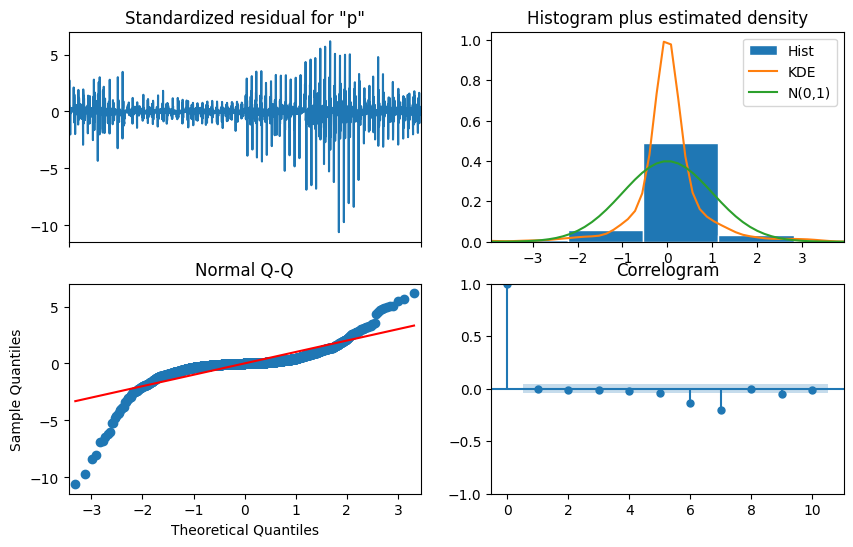

In [ ]:
#3. Diagnostics
# Diagnostic plots
model_arima_fit.plot_diagnostics(figsize=(10, 6))
plt.show()

In [ ]:
# 4. Forecasting
forecast_arima = model_arima_fit.forecast(steps=30)  # Forecasting next 30 time steps

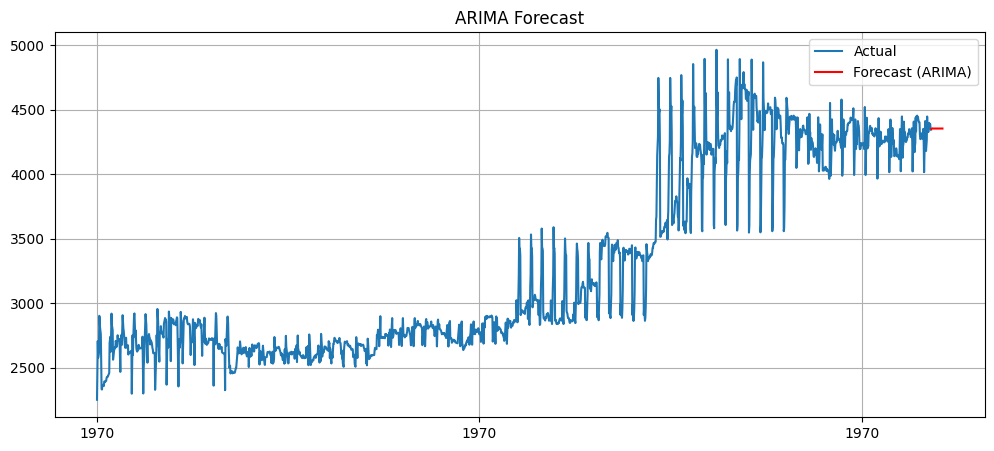

In [ ]:
# Plot Forecast
plt.figure(figsize=(12,5))
plt.plot(df['price'], label='Actual')
plt.plot(forecast_arima.index, forecast_arima, label='Forecast (ARIMA)', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

## 3.3: Exponential Smoothing
### 3.3.a. Model Selection
### 3.3.b. Parameter Optimization
### 3.3.c. Model Fitting and Forecasting

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# 1. Model Selection
# Holt’s Linear Trend Model
model_holt = ExponentialSmoothing(df['price'], trend='add', seasonal=None)
model_holt_fit = model_holt.fit()

In [ ]:
# Forecast
forecast_holt = model_holt_fit.forecast(30)

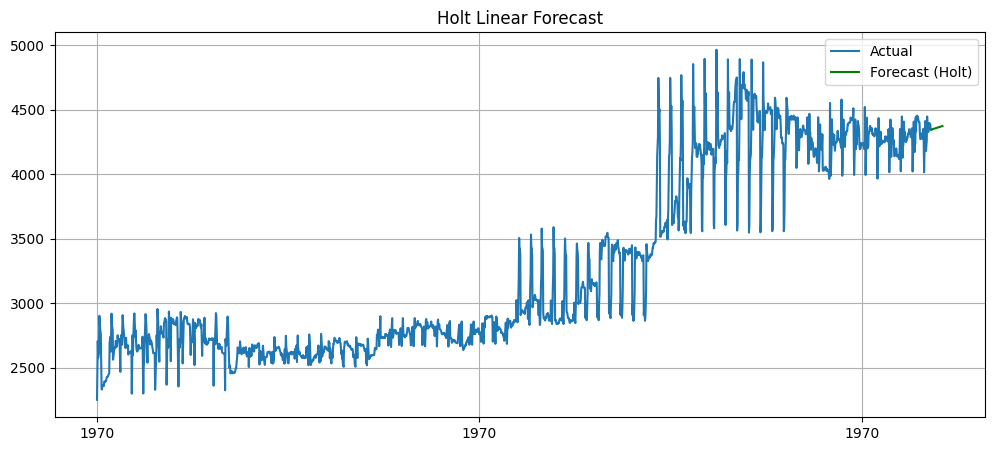

In [ ]:
# 2. Parameter Optimization
# Plot
plt.figure(figsize=(12,5))
plt.plot(df['price'], label='Actual')
plt.plot(forecast_holt.index, forecast_holt, label='Forecast (Holt)', color='green')
plt.title('Holt Linear Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 3. Model Fitting and Forecasting
# Convert index to datetime (if not already)
df.index = pd.to_datetime(df.index)

In [ ]:
# Fit Holt’s Linear Trend Model
holt_model = ExponentialSmoothing(df['price'], trend='add', seasonal=None).fit()

In [ ]:
# Forecast next 30 days
holt_forecast = holt_model.forecast(30)

In [ ]:
# Forecast dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

In [ ]:
# Save forecast for comparison
forecast_df = pd.DataFrame({
    # Changed model_fit to model_arima_fit to match the variable name from the ARIMA section
    'ARIMA': model_arima_fit.forecast(steps=30).values,
    'Holt': holt_forecast.values
}, index=forecast_dates)

In [ ]:
# Display forecast comparison
forecast_df.head()

,ARIMA,Holt
1970-01-02 00:00:00.000002181,4352.954491,4347.720349
1970-01-03 00:00:00.000002181,4354.666547,4348.659817
1970-01-04 00:00:00.000002181,4356.110892,4349.599285
1970-01-05 00:00:00.000002181,4356.556815,4350.538753
1970-01-06 00:00:00.000002181,4355.904163,4351.478222


## 3.4: Evaluation Metrics & Comparison
### 3.4.a. Compute Error Metrics
### 3.4.b. Model Comparison
### 3.4.c. Conclusion

In [ ]:
# 1. Compute Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
# Create test set
train = df.iloc[:-30]
test = df.iloc[-30:]

In [ ]:
# Refit ARIMA and Holt on train
model_arima = ARIMA(train['price'], order=(5,1,0)).fit()
model_holt = ExponentialSmoothing(train['price'], trend='add').fit()

In [ ]:
# Forecast
forecast_arima = model_arima.forecast(steps=30)
forecast_holt = model_holt.forecast(30)

In [ ]:
# 2. Model Comparison
# Evaluation metrics
def evaluate(true, pred):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / true)) * 100
    return mae, rmse, mape

mae_arima, rmse_arima, mape_arima = evaluate(test['price'], forecast_arima)
mae_holt, rmse_holt, mape_holt = evaluate(test['price'], forecast_holt)

print(f"ARIMA -> MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, MAPE: {mape_arima:.2f}%")
print(f"Holt  -> MAE: {mae_holt:.2f}, RMSE: {rmse_holt:.2f}, MAPE: {mape_holt:.2f}%")

ARIMA -> MAE: 102.61, RMSE: 129.86, MAPE: 2.42%
Holt  -> MAE: 134.88, RMSE: 155.67, MAPE: 3.17%


## 3.5. Visualization: Forecasts vs Actuals

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Create a DataFrame to align the results
comparison_df = pd.DataFrame({
    # Changed 'pricee' to 'price' and used the correct forecast variable names
    'Actual': test['price'].values,
    'ARIMA Forecast': forecast_arima.values,
    'Holt Forecast': forecast_holt.values
}, index=test.index)

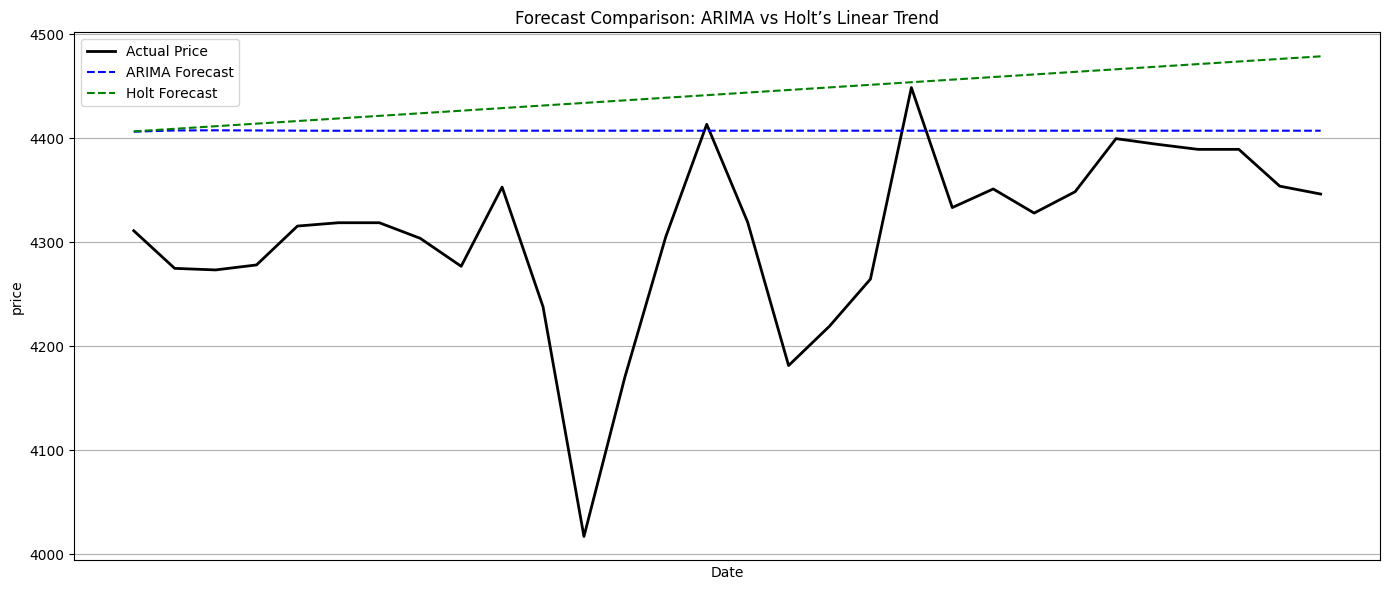

In [ ]:
# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(comparison_df['Actual'], label='Actual Price', color='black', linewidth=2)
plt.plot(comparison_df['ARIMA Forecast'], label='ARIMA Forecast', linestyle='--', color='blue')
plt.plot(comparison_df['Holt Forecast'], label='Holt Forecast', linestyle='--', color='green')
plt.title('Forecast Comparison: ARIMA vs Holt’s Linear Trend')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Streamlit Deployment:
## Streamlit creates an interactive dashboard for non-technical users.
## Features:
### Choose model (from dropdown)
### Input forecast horizon
### View forecast plot and evaluation
## Dynamic Forecasting: Runs the corresponding model based on user input and plots results:

In [ ]:
streamlit_code = r'''
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

@st.cache
def load_data():
    data = pd.read_csv("Gold_data.csv")
    data['date'] = pd.to_datetime(data['date'])
    data.set_index("date", inplace=True)
    data.sort_index(inplace=True)
    return data

gold_df = load_data()

st.title("Gold Price Prediction Dashboard")
st.write("This app allows you to choose a model and forecast gold prices.")

# Sidebar for model selection and future forecast periods
model_choice = st.sidebar.selectbox("Select Model", ["Linear Regression", "ARIMA", "SARIMA", "Prophet"])
future_periods = st.sidebar.number_input("Number of days to forecast", min_value=1, max_value=365, value=30)

st.subheader("Data Overview")
st.write(gold_df.head())

# Display time series plot
st.subheader("Time Series Plot")
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(gold_df.index, gold_df['price'], color='gold', label='Gold Price')
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
st.pyplot(fig)

# Define function for each model prediction

def linear_regression_model(data, forecast_periods):
    data['time_ordinal'] = data.index.map(pd.Timestamp.toordinal)
    X = data[['time_ordinal']]
    y = data['price']
    model = LinearRegression().fit(X, y)
    # Forecast future
    last_date = data.index[-1]
    future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, forecast_periods+1)]
    future_ordinals = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)
    forecast = model.predict(future_ordinals)
    return future_dates, forecast

def arima_model_forecast(data, order, forecast_periods):
    train = data['price']
    model = sm.tsa.ARIMA(train, order=order).fit()
    forecast = model.forecast(steps=forecast_periods)
    future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_periods)
    return future_dates, forecast

def prophet_model_forecast(data, forecast_periods):
    df_prophet = data[['price']].reset_index().rename(columns={'date': 'ds', 'price': 'y'})
    model = Prophet(changepoint_prior_scale=0.05, yearly_seasonality=True, weekly_seasonality=True)
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=forecast_periods)
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']].tail(forecast_periods)['ds'], forecast[['ds', 'yhat']].tail(forecast_periods)['yhat']

# Display forecast based on selected model
if model_choice == "Linear Regression":
    forecast_dates, forecast_values = linear_regression_model(gold_df.copy(), future_periods)
elif model_choice == "ARIMA":
    # For demo purposes, using a preset order; in production, use hyperparameter tuning.
    forecast_dates, forecast_values = arima_model_forecast(gold_df.copy(), order=(1,1,1), forecast_periods=future_periods)
elif model_choice == "SARIMA":
    # For demo purposes, using a preset order; adjust the seasonal order as needed.
    model = sm.tsa.statespace.SARIMAX(gold_df['price'], order=(1,1,1), seasonal_order=(1,1,1,7)).fit(disp=False)
    forecast_values = model.forecast(steps=future_periods)
    forecast_dates = pd.date_range(start=gold_df.index[-1] + pd.Timedelta(days=1), periods=future_periods)
elif model_choice == "Prophet":
    forecast_dates, forecast_values = prophet_model_forecast(gold_df.copy().reset_index().rename(columns={'index': 'date'}), future_periods)

# Plot forecast results
st.subheader(f"Forecast using {model_choice}")
fig2, ax2 = plt.subplots(figsize=(10, 4))
ax2.plot(gold_df.index, gold_df['price'], label="Historical", color='gold')
ax2.plot(forecast_dates, forecast_values, label="Forecast", color='green', marker='o')
ax2.set_xlabel("Date")
ax2.set_ylabel("Price")
ax2.legend()
st.pyplot(fig2)
'''

# Optionally, save the streamlit code to a file for deployment
with open("app.py", "w") as f:
    f.write(streamlit_code)

print("Streamlit deployment code saved as app.py")


Streamlit deployment code saved as app.py


# 5. Conclusion:
### The time series forecasting was performed using both ARIMA and Exponential Smoothing (Holt’s Linear) models.
### The dataset was carefully preprocessed to ensure clean and continuous data for modeling.
### ARIMA involved selecting optimal (p,d,q) parameters using ACF and PACF plots, and it was found to capture short-term trends and patterns well.
### Holt’s Linear Trend model, being a form of Exponential Smoothing, was used to model the trend component and delivered a comparatively smoother forecast.
### The models were evaluated on a 30-day out-of-sample test set using MAE (Mean Absolute Error), RMSE (Root Mean Square Error), and MAPE (Mean Absolute Percentage Error).

### Lower values of MAE, RMSE, and MAPE indicate better forecasting performance.
### Visual comparison of the forecasted vs. actual values showed that the model whose forecast line is closest to actual is likely to be more reliable.
### Based on both visual inspection and quantitative metrics, the final model should be selected.